In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d aryashah2k/breast-ultrasound-images-dataset

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
!dataset = https://www.kaggle.com/datasets/aryashah2k/breast-ultrasound-images-dataset

/bin/bash: dataset: command not found


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/breast-ultrasound-images-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

breast-ultrasound-images-dataset.zip  kaggle.json
Dataset_BUSI_with_GT		      sample_data


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
benign_tumor = os.listdir('/content/Dataset_BUSI_with_GT/benign')
print(benign_tumor[0:5])
print(benign_tumor[-5:])


['benign (238)_mask.png', 'benign (261).png', 'benign (307)_mask.png', 'benign (68)_mask.png', 'benign (115).png']
['benign (99)_mask.png', 'benign (314).png', 'benign (418)_mask.png', 'benign (184)_mask.png', 'benign (228).png']


In [ ]:
Malignant_tumor = os.listdir('/content/Dataset_BUSI_with_GT/malignant')
print(Malignant_tumor[0:5])
print(Malignant_tumor[-5:])


['malignant (160)_mask.png', 'malignant (85)_mask.png', 'malignant (89)_mask.png', 'malignant (100)_mask.png', 'malignant (56).png']
['malignant (55)_mask.png', 'malignant (111).png', 'malignant (52).png', 'malignant (210).png', 'malignant (184)_mask.png']


In [ ]:
normal_case = os.listdir('/content/Dataset_BUSI_with_GT/normal')
print(normal_case[0:5])
print(normal_case[-5:])


['normal (48).png', 'normal (39)_mask.png', 'normal (80).png', 'normal (105).png', 'normal (89).png']
['normal (76)_mask.png', 'normal (101)_mask.png', 'normal (129).png', 'normal (17)_mask.png', 'normal (68)_mask.png']


In [ ]:
print('Number of with benign_tumor images:', len(benign_tumor))
print('Number of with Malignant_tumor images:', len(Malignant_tumor))
print('Number of with normal_case images:', len(normal_case))

Number of with benign_tumor images: 891
Number of with Malignant_tumor images: 421
Number of with normal_case images: 266


In [ ]:
#creating label
#b = b
#m= m
#n = n

In [ ]:
benign_labels  = [0]*891
Malignan_labels = [1]*421
normal_labels= [2]*266

In [ ]:
print(benign_labels[0:5])

print(Malignan_labels[0:5])

print(normal_labels[0:5])

[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]
[2, 2, 2, 2, 2]


In [ ]:
print(benign_labels[0:5])

print(Malignan_labels[0:5])

print(normal_labels[0:5])

[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]
[2, 2, 2, 2, 2]


In [ ]:
print(len(benign_labels))
print(len(Malignan_labels))
print(len(normal_labels))


891
421
266


In [ ]:
labels = benign_labels + Malignan_labels + normal_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

1578
[0, 0, 0, 0, 0]
[2, 2, 2, 2, 2]


In [ ]:
#dispaly the img

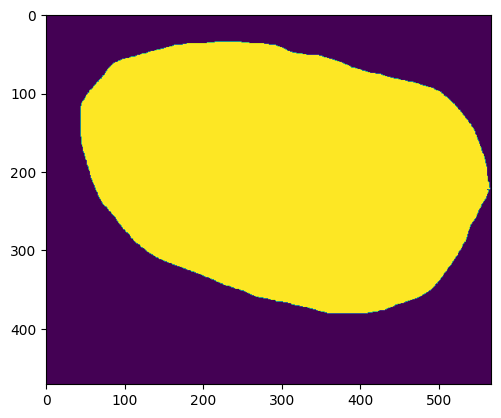

In [ ]:
#displaying img with benign case
img = mpimg.imread('/content/Dataset_BUSI_with_GT/benign/benign (141)_mask.png')
imgplot = plt.imshow(img)
plt.show()

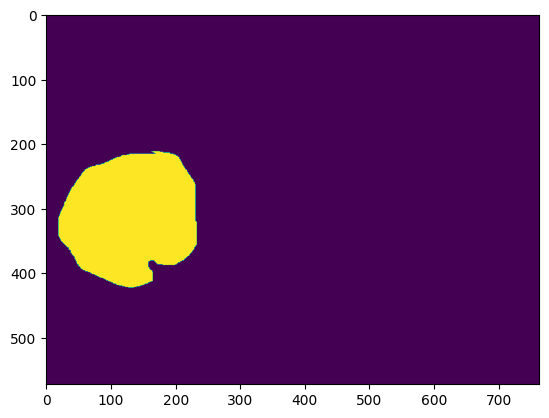

In [ ]:
#displaying img with malignant case
img = mpimg.imread('/content/Dataset_BUSI_with_GT/malignant/malignant (149)_mask.png')
imgplot = plt.imshow(img)
plt.show()

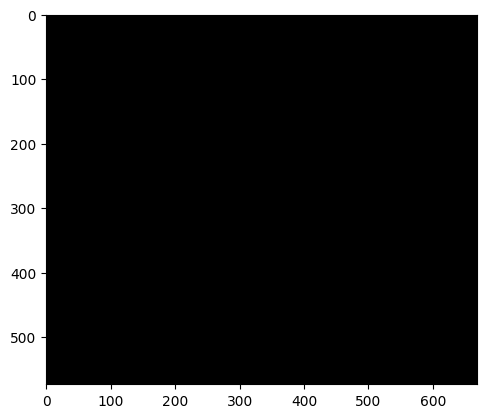

In [ ]:
#displaying img with normal case
img = mpimg.imread('/content/Dataset_BUSI_with_GT/normal/normal (131)_mask.png')
imgplot = plt.imshow(img)
plt.show()


**Image** **Processing**

Resize the Images

Convert the images to numpy arrays

In [ ]:
# convert images to numpy arrays+
#note think you should change it in rgb or not

benign_tumor_path = '/content/Dataset_BUSI_with_GT/benign/'

data = []

for img_file in benign_tumor:

  image = Image.open(benign_tumor_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



Malignant_tumor_path = '/content/Dataset_BUSI_with_GT/malignant/'


for img_file in Malignant_tumor:

  image = Image.open(Malignant_tumor_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


normal_case_path = '/content/Dataset_BUSI_with_GT/normal/'


for img_file in normal_case:

  image = Image.open(normal_case_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [ ]:
type(data)

list

In [ ]:
len(data)

1578

In [ ]:
data[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [ ]:
#type of 1st data in list which is npy array and nd array
type(data[0])

numpy.ndarray

In [ ]:
#shape cause of its 128*128 dim
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(1578, 128, 128, 3)
(1578,)


In [ ]:
print(Y)

[0 0 0 ... 2 2 2]


**Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(1578, 128, 128, 3) (1262, 128, 128, 3) (316, 128, 128, 3)


In [ ]:
# scaling the data & for black 0 and for 1 white so we can know so white = 255 so we did this

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
#recreate this train and test have some error also run X_train[0]
X[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [ ]:
X_train_inv = X_train*255
X_test_inv = X_test*255

In [ ]:
X_train_scaled[0]

array([[[0.58431373, 0.58431373, 0.58431373],
        [0.60392157, 0.60392157, 0.60392157],
        [0.59215686, 0.59215686, 0.59215686],
        ...,
        [0.70196078, 0.70196078, 0.70196078],
        [0.65098039, 0.65098039, 0.65098039],
        [0.65490196, 0.65490196, 0.65490196]],

       [[0.65882353, 0.65882353, 0.65882353],
        [0.66666667, 0.66666667, 0.66666667],
        [0.6627451 , 0.6627451 , 0.6627451 ],
        ...,
        [0.78039216, 0.78039216, 0.78039216],
        [0.78431373, 0.78431373, 0.78431373],
        [0.76862745, 0.76862745, 0.76862745]],

       [[0.75686275, 0.75686275, 0.75686275],
        [0.78431373, 0.78431373, 0.78431373],
        [0.74901961, 0.74901961, 0.74901961],
        ...,
        [0.65882353, 0.65882353, 0.65882353],
        [0.66666667, 0.66666667, 0.66666667],
        [0.65098039, 0.65098039, 0.65098039]],

       ...,

       [[0.00784314, 0.00784314, 0.00784314],
        [0.01176471, 0.01176471, 0.01176471],
        [0.00784314, 0

**Building a Convolutional Neural Networks (CNN)**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 3

#stack all our layers
model = keras.Sequential()

#adding some layer and filter value like 32 64 and flatten layer two dense layer and final op layer
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


#model.add(keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
#model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='softmax'))

In [ ]:
# compile the neural network means to set
#optimization algo
#loss fun matrix for our nn
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network trin in 90 and 10 rem 10 vali carried out here
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
36/36 [==============================] - 13s 38ms/step - loss: 1.0519 - acc: 0.4943 - val_loss: 0.8998 - val_acc: 0.5906
Epoch 2/5
36/36 [==============================] - 1s 16ms/step - loss: 0.9016 - acc: 0.5965 - val_loss: 0.7848 - val_acc: 0.7008
Epoch 3/5
36/36 [==============================] - 1s 20ms/step - loss: 0.7959 - acc: 0.6581 - val_loss: 0.7184 - val_acc: 0.7087
Epoch 4/5
36/36 [==============================] - 1s 17ms/step - loss: 0.7093 - acc: 0.7048 - val_loss: 0.6936 - val_acc: 0.7244
Epoch 5/5
36/36 [==============================] - 1s 22ms/step - loss: 0.5986 - acc: 0.7419 - val_loss: 0.6789 - val_acc: 0.7165


**Model Evaluation**

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

10/10 [==============================] - 0s 25ms/step - loss: 0.8206 - acc: 0.6741
Test Accuracy = 0.6740506291389465


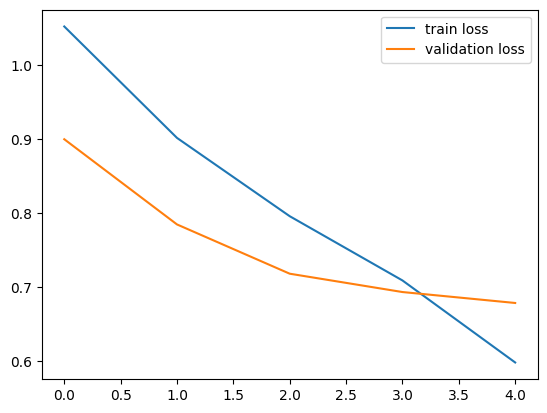

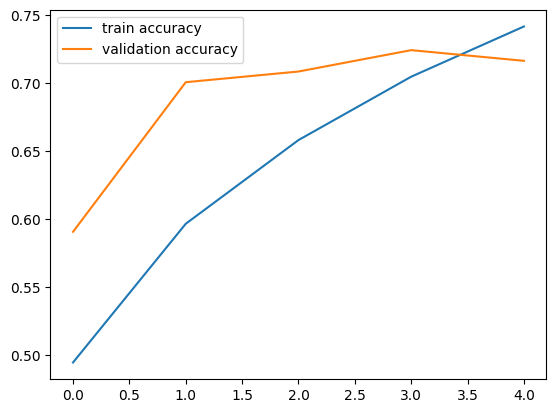

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/download (1).png


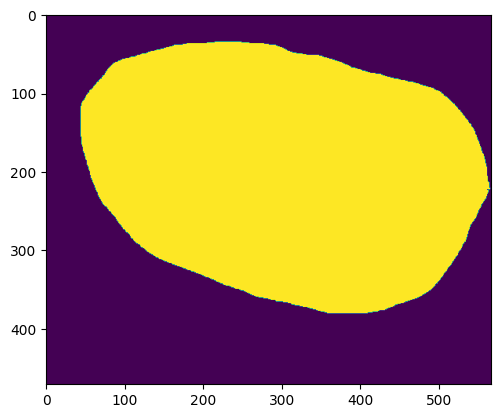

1/1 [==============================] - 0s 156ms/step
[[0.9862716  0.00803253 0.00569579]]
0
The person in the image is having benign tumor


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 0:

  print('The person in the image is having benign tumor')

elif input_pred_label == 1:

  print('The person in the image is having malignant tumor')

else:

  print('The person in the image is normal case')

In [ ]:
-
